In [ ]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline

X = [X0(bias), X1, X2, X3, X4, X5, X6], six variables are used.
Data is split into three parts: training set, validation set, and test set

In [2]:
X = np.ones([63, 7], dtype = np.float64)
Y = np.ones([63], dtype = np.float64)

In [3]:
# read data
rowNum = 0
with open('stock_portfolio_performance_data_set.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        if rowNum == 0:
            rowNum += 1
        else:
            col = 0
            colNum = 0
            for col in row:
                if colNum != 6:
                    X[rowNum - 1, colNum + 1] = col
                else:
                    Y[rowNum - 1] = col
                colNum += 1
            rowNum += 1

print (X[23,:])
print (Y[23])

[ 1.     0.333  0.     0.333  0.333  0.     0.   ]
0.164


In [4]:
num_train = int(math.floor(X.shape[0] * 0.64))
num_validate = int(math.floor(X.shape[0] * 0.16))

X_train = X[0 : num_train]
X_validate = X[num_train : num_train + num_validate]
X_test = X[num_train + num_validate : X.shape[0]]
Y_train = Y[0 : num_train]
Y_validate = Y[num_train : num_train + num_validate]
Y_test = Y[num_train + num_validate : X.shape[0]]

print ('X.shape:', X.shape)
print ('Y.shape:', Y.shape)
print ('X_train.shape', X_train.shape)
print ('X_validate.shape', X_validate.shape)
print ('X_test.shape', X_test.shape)
print ('Y_train.shape', Y_train.shape)
print ('Y_validate.shape', Y_validate.shape)
print ('Y_test.shape', Y_test.shape)

X.shape: (63, 7)
Y.shape: (63,)
X_train.shape (40, 7)
X_validate.shape (10, 7)
X_test.shape (13, 7)
Y_train.shape (40,)
Y_validate.shape (10,)
Y_test.shape (13,)


Linear Kernel Method

In [5]:
# To check if a matrix is a singular, if it's not a singular matrix, directly set lamda to zero, since we don't need lamda
def isInvertible(inputMatrix):
    return inputMatrix.shape[0] == inputMatrix.shape[1] and np.linalg.matrix_rank(inputMatrix) == inputMatrix.shape[0]

In [6]:
def linear_kernel_predict(X_train, Y_train, X_test, lamda_param, isToy):
    N = X_train.shape[0]
    
    Y_pred = np.empty([X_test.shape[0]])
    
    for idx in range(0, X_test.shape[0]):
        # calculate k(x, x')
        k_x_xprime = X_train.dot(X_test[idx, :].T)
        if isToy:
            print 'k_x_xprime:\n', k_x_xprime

        # calculate K = phi(x) * phi(x).T
        K = X_train.dot(X_train.T)
        if isToy:
            print 'K:\n', K

        if isToy:
            print 'isInvertible: ', isInvertible(K)
        if isInvertible(K):
            inv_K = np.linalg.inv(K)
        else:
            inv_K = np.linalg.inv(K + lamda_param * np.eye(K.shape[0]))
        if isToy:
            print 'inv_K:\n', inv_K

        Y_pred[idx] = k_x_xprime.T.dot(inv_K).dot(Y_train.T)
    
    return Y_pred

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-6-0e69af44b911>, line 10)

In [ ]:
# This is a toy example, in this example we manually pre-calculated the results
# and compared the results got from the code to make sure the implementation our algorithm is correct
Y_pred = linear_kernel_predict(X_train = np.array([[1, 1], [1, 2], [1, 3]]), Y_train = np.array([2, 4, 8]), X_test = np.array([[1, 4]]), lamda_param = 1, isToy = True)
print 'Y_pred:\n', Y_pred

Polynomial Kernel Method

In [ ]:
# k(x,x') = (gama * x.T * x' + r) ^ M
def polynomial_kernel_predict(X_train, Y_train, X_test, gama, r, M, lamda_param, isToy):
    N = X_train.shape[0]
    
    Y_pred = np.empty(X_test.shape[0])
    
    for idx in range(0, X_test.shape[0]):
        # calculate k(x, x')
        k_x_xprime = np.power(gama * X_train.dot(X_test[idx, :].T) + r, M)
        if isToy:
            print 'k_x_xprime:\n', k_x_xprime

        # calculate K = phi(x) * phi(x).T
        K = np.power(gama * X_train.dot(X_train.T) + r, M)
        if isToy:
            print 'K:\n', K

        if isToy:
            print 'isInvertible: ', isInvertible(K)
        if isInvertible(K):
            inv_K = np.linalg.inv(K)
        else:
            inv_K = np.linalg.inv(K + lamda_param * np.eye(K.shape[0]))
        if isToy:
            print 'inv_K:\n', inv_K

        Y_pred[idx] = k_x_xprime.T.dot(inv_K).dot(Y_train.T)
    
    return Y_pred

In [ ]:
# Toy example
Y_pred = polynomial_kernel_predict(X_train = np.array([[0, 1], [0, 2], [0, 3]]), Y_train = np.array([2, 4, 8]), X_test = np.array([[0, 4]]), gama = 1, r = 1, M = 2, lamda_param = 0, isToy = True)
print 'Y_pred:\n', Y_pred

Gaussian Kernel Method

In [ ]:
def gaussian_kernel_predict(X_train, Y_train, X_test, sigma, lamda_param, isToy):
    N = X_train.shape[0]
    
    Y_pred = np.empty(X_test.shape[0])
  
    for index in range(0, X_test.shape[0]):
        # calculate k(x, x')
        k_x_xprime = np.empty([N, 1])
        for idx in range(0, N):
            k_x_xprime[idx, :] = math.exp(-(np.linalg.norm(X_train[idx, :].T - X_test[index, :].T, ord = 2) ** 2) / (2 * (sigma ** 2)))
        if isToy:
            print 'k_x_xprime:\n', k_x_xprime

        # calculate K = phi(x) * phi(x).T
        K = np.empty([N, N])
        for row in range(0, N):
            for col in range(0, N):
                K[row, col] = math.exp(-(np.linalg.norm(X_train[row, :].T - X_train[col, :].T, ord = 2) ** 2) / (2 * (sigma ** 2)))
        if isToy:
            print 'K:\n', K

        if isToy:
            print 'isInvertible: ', isInvertible(K)
        if isInvertible(K):
            inv_K = np.linalg.inv(K)
        else:
            inv_K = np.linalg.inv(K + lamda_param * np.eye(K.shape[0]))
        if isToy:
            print 'inv_K:\n', inv_K

        Y_pred[index] = k_x_xprime.T.dot(inv_K).dot(Y_train.T)
    
    return Y_pred

In [ ]:
# Toy example
Y_pred = gaussian_kernel_predict(X_train = np.array([[1, 1], [1, 2], [1, 3]]), Y_train = np.array([2, 4, 8]), X_test = np.array([[1, 4]]), sigma = 1, lamda_param = 1, isToy = True)
print 'Y_pred:\n', Y_pred

In [ ]:
# Real training process
mse_history = {}

Linear Kernelized Regression

In [7]:
best_score = 100
best_lamda = 0

linear_mse_score = []
lamda_choices = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
for lamda_param in lamda_choices:
    Y_pred = linear_kernel_predict(X_train = X_train, Y_train = Y_train, X_test = X_validate, lamda_param = lamda_param, isToy = False)
    mse = np.square(Y_pred - Y_validate).mean()
    
    if mse < best_score:
        best_lamda = lamda_param
        best_score = mse
    
    linear_mse_score.append(mse)
    print 'lamda = ', lamda_param, ' validate_mse_score = ', mse

Y_pred = linear_kernel_predict(X_train = X_train, Y_train = Y_train, X_test = X_test, lamda_param = best_lamda, isToy = False)
test_score = np.square(Y_pred - Y_test).mean()
print '\nbest lamda is: ', best_lamda, ' test_mse_score = ', test_score, '\n'

mse_history['linear'] = test_score

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-7-c7d45caa7817>, line 15)

Polynomial Kernelized Regression

In [8]:
best_score = 100
best_lamda = 0
best_gama = 0
best_r = 0
best_M = 0

linear_mse_score = []

lamda_choices = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
gama_choices = [1, 2, 3, 4, 5]
r_choices = [1, 2, 3, 4, 5]
M_choices = [-1, 0, 0.5, 1, 2, 3]
for lamda_param in lamda_choices:
    for gama in gama_choices:
        for r in r_choices:
            for M in M_choices:
                Y_pred = polynomial_kernel_predict(X_train = X_train, Y_train = Y_train, X_test = X_validate, gama = gama, r = r, M = M, lamda_param = lamda_param, isToy = False)
                
                mse = np.square(Y_pred - Y_validate).mean()
    
                if mse < best_score:
                    best_lamda = lamda_param
                    best_gama = gama
                    best_r = r
                    best_M = M
                    best_score = mse
    
                linear_mse_score.append(mse)
                print 'lamda = ', lamda_param, ' gama = ', gama, ' r = ', r, ' M = ', M, ' validate_mse_score = ', mse

Y_pred = polynomial_kernel_predict(X_train = X_train, Y_train = Y_train, X_test = X_test, gama = best_gama, r = best_r, M = best_M, lamda_param = best_lamda, isToy = False)
test_score = np.square(Y_pred - Y_test).mean()
print '\nbest lamda = ', best_lamda, ' best gama = ', best_gama, ' best r = ', best_r, ' best M = ', best_M, ' test_mse_score = ', test_score, '\n'

mse_history['polynomial'] = test_score

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-8-750f888545a7>, line 29)

Gaussian Kernelized Regression

In [9]:
best_score = 100
best_lamda = 0
best_sigma = 0

linear_mse_score = []

lamda_choices = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
sigma_choices = [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 3]
for lamda_param in lamda_choices:
    for sigma in sigma_choices:
        Y_pred = gaussian_kernel_predict(X_train = X_train, Y_train = Y_train, X_test = X_validate, sigma = sigma, lamda_param = lamda_param, isToy = False)

        mse = np.square(Y_pred - Y_validate).mean()

        if mse < best_score:
            best_lamda = lamda_param
            best_sigma = sigma
            best_score = mse

        linear_mse_score.append(mse)
        print 'lamda = ', lamda_param, ' sigma = ', sigma, ' mse_score = ', mse

Y_pred = gaussian_kernel_predict(X_train = X_train, Y_train = Y_train, X_test = X_test, sigma = best_sigma, lamda_param = best_lamda, isToy = False)
test_score = np.square(Y_pred - Y_test).mean()
print '\nbest lamda = ', best_lamda, ' best sigma = ', best_sigma, ' test_mse_score = ', test_score, '\n'

mse_history['gaussian'] = test_score

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-9-24f734dd8435>, line 21)

In [10]:
# Best performance across all the kernels
best_score = min(mse_history.values()) # minimum value
best_kernel = [k for k, v in mse_history.items() if v == best_score] # getting keys containing the minimum
print 'Best Kernel: ', best_kernel, ' Test MSE Score: ', best_score

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-10-603a0f034d7b>, line 4)

Unit Test: you must display your model working on a trivial data set consisting of one or two input values and one output value (so that you can plot it in two or three dimensions). For this trivial data, you should calculate the performance measure and generate a plot to show the actual classification of new data. You are allowed to create your own data for this "unit test". Here, the dataset is manually created. The distribution of the dataset is a circle, y=(x1-5)^2+(x2-5)^2-3^2, if y >= 0, the data is colored for one type, if y < 0, the data is colored for another type 

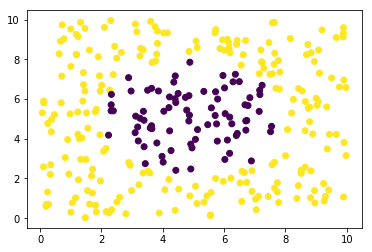

In [11]:
# Manually create dataset
numDot = 300

x1 = 10.0 * np.random.rand(numDot)
x2 = 10.0 * np.random.rand(numDot)
y = np.square(x1 - 5) + np.square(x2 - 5) - 9
plt.scatter(x1, x2, c= (y > 0))

In [12]:
# Split data into three parts, train, validate, and test
num_train = int(numDot * 0.64)
num_validate = int(numDot * 0.16)
num_test = numDot - num_train - num_validate
X_train = np.concatenate((np.ones([num_train, 1]), np.reshape(x1[0: num_train].T, (num_train, 1)), np.reshape(x2[0: num_train].T, (num_train, 1))), axis = 1)
X_validate = np.concatenate((np.ones([num_validate, 1]), np.reshape(x1[num_train: num_train+num_validate].T, (num_validate, 1)), np.reshape(x2[num_train: num_train+num_validate].T, (num_validate, 1))), axis = 1)
X_test = np.concatenate((np.ones([num_test, 1]), np.reshape(x1[num_train+num_validate: numDot].T, (num_test, 1)), np.reshape(x2[num_train+num_validate: numDot].T, (num_test, 1))), axis = 1)

print X_train.shape
print X_validate.shape
print X_test.shape

Y_train = y[0: num_train]
Y_validate = y[num_train: num_train+num_validate]
Y_test = y[num_train+num_validate: numDot]

print Y_train.shape
print Y_validate.shape
print Y_test.shape

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-12-02e3e153b8a0>, line 9)

From the distribution of data, we can easily find that the data is distributed in a circle. So, we consider polynomial kernelized regression as an example. The implementation of other kernels are already done in the previous dataset experiment.

Polynomial Kernelized Regression

In [13]:
best_mse = 1e9
best_lamda = 0
best_gama = 0
best_r = 0
best_M = 0

lamda_choices = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
gama_choices = [1]
r_choices = [1, 2]
M_choices = [2]
for lamda_param in lamda_choices:
    for gama in gama_choices:
        for r in r_choices:
            for M in M_choices:
                Y_pred = polynomial_kernel_predict(X_train = X_train, Y_train = Y_train, X_test = X_validate, gama = gama, r = r, M = M, lamda_param = lamda_param, isToy = False)
                
                mse = np.square(Y_pred - Y_validate).mean()
    
                if mse < best_mse:
                    best_lamda = lamda_param
                    best_gama = gama
                    best_r = r
                    best_M = M
                    best_mse = mse
    
                print 'lamda = ', lamda_param, ' gama = ', gama, ' r = ', r, ' M = ', M, ' validate_mse = ', mse

Y_pred = polynomial_kernel_predict(X_train = X_train, Y_train = Y_train, X_test = X_test, gama = best_gama, r = best_r, M = best_M, lamda_param = best_lamda, isToy = False)
Y_pred_bin = (Y_pred > 0)
Y_test_bin = (Y_test > 0)
test_accuracy = (Y_pred_bin == Y_test_bin).mean()
print '\nbest lamda = ', best_lamda, ' best gama = ', best_gama, ' best r = ', best_r, ' best M = ', best_M, ' test_accuracy = ', test_accuracy, '\n'

plt.scatter(X_test[:, 1], X_test[:, 2], c = (Y_test > 0))
plt.title('Actual Data Distribution')
plt.figure()
plt.scatter(X_test[:, 1], X_test[:, 2], c = (Y_pred > 0))
plt.title('Predicted Data Distribution')

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-13-e4879df0a9b2>, line 26)